In [1]:
from pylab import *
from classy import *

Version:  0.0.57


In [2]:
images=image.load_images('data/digits')

[9]: 180 files found
[0]: 178 files found
[7]: 179 files found
[6]: 181 files found
[1]: 182 files found
[8]: 174 files found
[4]: 181 files found
[3]: 183 files found
[2]: 177 files found
[5]: 182 files found


In [3]:
images=image.load_images('mnist_png.zip/mnist_png/training')

[9]: 5949 files found
[0]: 5923 files found
[7]: 6265 files found
[6]: 5918 files found
[1]: 6742 files found
[8]: 5851 files found
[4]: 5842 files found
[3]: 6131 files found
[2]: 5958 files found
[5]: 5421 files found


In [4]:
images=image.load_images('mnist_png.zip/mnist_png/testing')

[9]: 1009 files found
[0]: 980 files found
[7]: 1028 files found
[6]: 958 files found
[1]: 1135 files found
[8]: 974 files found
[4]: 982 files found
[3]: 1010 files found
[2]: 1032 files found
[5]: 892 files found


In [6]:
images=image.load_images('fashion mnist png.zip/fashion mnist png/test/')

[9]: 1000 files found
[0]: 1000 files found
[7]: 1000 files found
[6]: 1000 files found
[1]: 1000 files found
[8]: 1000 files found
[4]: 1000 files found
[3]: 1000 files found
[2]: 1000 files found
[5]: 1000 files found


In [13]:
images=load_images('data/digits')

[9]: 180 files found
[0]: 178 files found
[7]: 179 files found
[6]: 181 files found
[1]: 182 files found
[8]: 174 files found
[4]: 181 files found
[3]: 183 files found
[2]: 177 files found
[5]: 182 files found


In [15]:
images.keys()

dict_keys(['DESCR', 'files', 'data', 'targets', 'target_names'])

In [18]:
type(images.data)

list

In [6]:
import zipfile
import numpy as np
from PIL import Image
from io import BytesIO


In [7]:
data=Struct()
data.DESCR="Images"
data.files=[]
data.data=[]
data.targets=[]
data.target_names=[]

make_grayscale=True

zipname='mnist_png.zip/mnist_png/training'
zipname='fashion mnist png.zip'
parts=zipname.split('/')
zipname=parts[0]

if len(parts)>1:
    rest='/'.join(parts[1:])+"/"
else:
    rest=''

with zipfile.ZipFile(zipname, 'r') as z:
    filenames = [f for f in z.namelist() 
                  if not '__MACOSX' in f and
                 not '.DS_Store' in f and
                 not 'desktop.ini' in f and
                 not '.ipynb_checkpoints' in f and
                 f.startswith(rest)
                 ]

    new_filenames=[f.replace(rest,'') for f in filenames]
    #filenames=['/'.join(f.split('/')[1:]) for f in filenames]
    assert not any([len(f.split('/')[1:])>2 for f in new_filenames]),"Not correct folder structure"

    target_names=[f.replace('/','') for f in new_filenames if f.endswith('/')]

    for i,name in enumerate(target_names):
        files=[f for f,f2 in zip(filenames,new_filenames)
                                     if f2.startswith(name+"/") and
                                      not f2.endswith('/')] 
        data.files.extend(files)
        data.targets.extend([i]*len(files))
        
    data.target_names=target_names

    all_same_size=True
    size=None
    for fname in data.files:
        with z.open(fname) as file:
            img = Image.open(BytesIO(file.read())).convert('RGB')
            if make_grayscale:
                img=img.convert('L')
            img=np.array(img)

            if size is None:
                size=img.shape
            else:
                if img.shape!=size:
                    all_same_size=False

            
            data.data.append(img)
    
    if not all_same_size:
        print("Warning: not all images the same size.")


AssertionError: Not correct folder structure

In [9]:
[f for f in new_filenames if f.endswith('/')]

['fashion mnist png/',
 'fashion mnist png/test/',
 'fashion mnist png/train/',
 'fashion mnist png/test/9/',
 'fashion mnist png/test/0/',
 'fashion mnist png/test/7/',
 'fashion mnist png/test/6/',
 'fashion mnist png/test/1/',
 'fashion mnist png/test/8/',
 'fashion mnist png/test/4/',
 'fashion mnist png/test/3/',
 'fashion mnist png/test/2/',
 'fashion mnist png/test/5/',
 'fashion mnist png/train/9/',
 'fashion mnist png/train/0/',
 'fashion mnist png/train/7/',
 'fashion mnist png/train/6/',
 'fashion mnist png/train/1/',
 'fashion mnist png/train/8/',
 'fashion mnist png/train/4/',
 'fashion mnist png/train/3/',
 'fashion mnist png/train/2/',
 'fashion mnist png/train/5/']

In [86]:
data.data[0].shape

(28, 28)

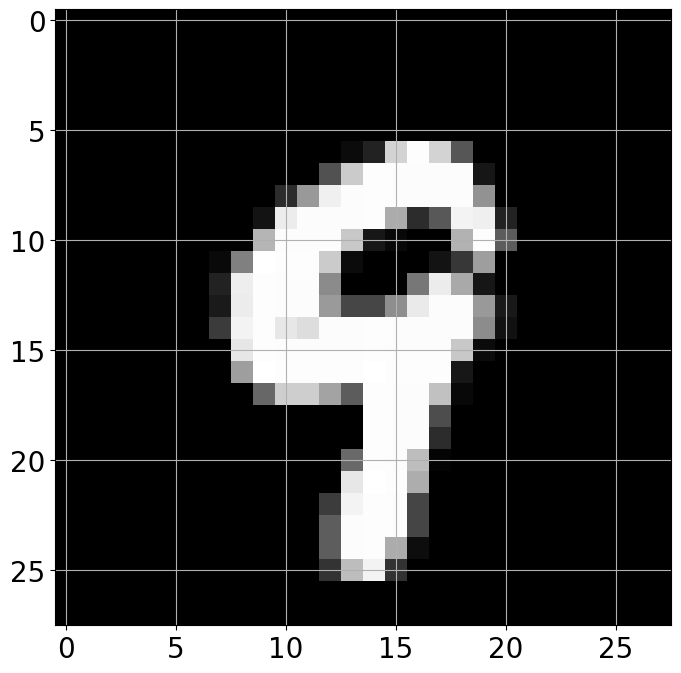

In [82]:
imshow(data.data[0],cmap=cm.gray)

In [53]:
#filenames=['/'.join(f.split('/')[1:]) for f in filenames]

In [54]:
print([len(f.split('/')) for f in filenames][:10])

[2, 3, 3, 4, 4, 4, 4, 4, 4, 4]


In [55]:
'training/'.split('/')

['training', '']

In [56]:
any([len(f.split('/'))>3 for f in filenames])

True

In [50]:
filenames[:20]

['',
 'training/',
 'testing/',
 'training/9/',
 'training/0/',
 'training/7/',
 'training/6/',
 'training/1/',
 'training/8/',
 'training/4/',
 'training/3/',
 'training/2/',
 'training/5/',
 'testing/9/',
 'testing/0/',
 'testing/7/',
 'testing/6/',
 'testing/1/',
 'testing/8/',
 'testing/4/']